Groupe : 


# 📊 Home Credit Default Risk
Ce notebook a pour objectif de prédire le risque de défaut de paiement en utilisant des techniques de prétraitement, réduction de dimension, détection des valeurs aberrantes, et modélisation par réseau de neurones.

### 4️⃣ Détection et suppression des valeurs aberrantes
Utilisation de méthodes statistiques ou de modèles comme Isolation Forest pour détecter les outliers.

## Analyse de Données

### 🧾 Description des colonnes principales

#### 🔑 Identifiants et cible

* **`SK_ID_CURR`** : Identifiant unique du client.
* **`TARGET`** : Variable cible indiquant si le prêt a été remboursé (0) ou non (1).

#### 👤 Informations personnelles

* **`NAME_CONTRACT_TYPE`** : Type de contrat (par exemple, prêt en espèces).
* **`CODE_GENDER`** : Sexe du client (`M`, `F`, ou `X`).
* **`FLAG_OWN_CAR`** : Possession d'une voiture (`Y` ou `N`).
* **`FLAG_OWN_REALTY`** : Possession d'un bien immobilier (`Y` ou `N`).
* **`CNT_CHILDREN`** : Nombre d'enfants à charge.
* **`NAME_TYPE_SUITE`** : Qui accompagne le client lors de la demande (par exemple, seul, famille).
* **`NAME_INCOME_TYPE`** : Type de revenu (par exemple, salarié, retraité).
* **`NAME_EDUCATION_TYPE`** : Niveau d'éducation.
* **`NAME_FAMILY_STATUS`** : Situation familiale.
* **`NAME_HOUSING_TYPE`** : Type de logement (par exemple, maison, appartement).
* **`OCCUPATION_TYPE`** : Profession du client.
* **`CNT_FAM_MEMBERS`** : Nombre de membres de la famille.

#### 💰 Informations financières

* **`AMT_INCOME_TOTAL`** : Revenu annuel total.
* **`AMT_CREDIT`** : Montant du crédit demandé.
* **`AMT_ANNUITY`** : Montant de l'annuité du prêt.
* **`AMT_GOODS_PRICE`** : Prix des biens pour lesquels le prêt est demandé.

#### 📅 Informations temporelles

* **`DAYS_BIRTH`** : Âge du client en jours (négatif).
* **`DAYS_EMPLOYED`** : Nombre de jours d'emploi (négatif).
* **`DAYS_REGISTRATION`** : Nombre de jours depuis l'enregistrement du client.
* **`DAYS_ID_PUBLISH`** : Nombre de jours depuis la dernière modification de l'identifiant.
* **`OWN_CAR_AGE`** : Âge de la voiture en années.

#### 📍 Informations géographiques

* **`REGION_POPULATION_RELATIVE`** : Population relative de la région.
* **`REGION_RATING_CLIENT`** : Évaluation de la région par le client.
* **`REGION_RATING_CLIENT_W_CITY`** : Évaluation de la région avec la ville.
* **`WEEKDAY_APPR_PROCESS_START`** : Jour de la semaine du début du processus de demande.
* **`HOUR_APPR_PROCESS_START`** : Heure du début du processus de demande.

#### 📞 Informations de contact

* **`FLAG_MOBIL`** : Possession d'un téléphone mobile.
* **`FLAG_EMP_PHONE`** : Possession d'un téléphone professionnel.
* **`FLAG_WORK_PHONE`** : Possession d'un téléphone de travail.
* **`FLAG_CONT_MOBILE`** : Utilisation continue du mobile.
* **`FLAG_PHONE`** : Possession d'un téléphone.
* **`FLAG_EMAIL`** : Possession d'une adresse e-mail.

#### 🏢 Informations sur le logement

* **`APARTMENTS_AVG`**, **`BASEMENTAREA_AVG`**, **`YEARS_BUILD_AVG`**, etc. : Informations moyennes sur le logement (surface, année de construction, etc.).

#### 📄 Documents fournis

* **`FLAG_DOCUMENT_2`** à **`FLAG_DOCUMENT_21`** : Indicateurs de documents fournis par le client.

#### 📊 Sources externes

* **`EXT_SOURCE_1`**, **`EXT_SOURCE_2`**, **`EXT_SOURCE_3`** : Scores externes d'évaluation du risque.

#### 🔁 Historique de crédit

* **`AMT_REQ_CREDIT_BUREAU_HOUR`**, **`AMT_REQ_CREDIT_BUREAU_DAY`**, etc. : Nombre de demandes de crédit auprès du bureau de crédit sur différentes périodes.


### 1️⃣ Importation des librairies
On commence par importer les bibliothèques nécessaires à l'analyse.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

In [2]:
# Pouvoir afficher toutes les sorties
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)

### 2️⃣ Chargement et exploration des données
Chargement du jeu de données et exploration initiale pour comprendre sa structure.

In [3]:
app_train = pd.read_csv('D:/IPSSI/Cours/ML&IA/Projet/application_train.csv')
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 3️⃣ Nettoyage des données
Suppression des doublons, gestion des valeurs manquantes, traitement des colonnes inutiles.

#### Suppression des colonnes avec Nan > 50 %

In [4]:
app_train.shape
# #Ici, on n'apas la colonne target
# X_test.shape

(307511, 122)

In [5]:
app_train.isna().mean()*100
# On drop les colonnes avec plus de 50% de valeurs null
seuil = 0.5  # 50%
app_train_cleaned = app_train.loc[:, app_train.isnull().mean() < seuil]

In [6]:
# On retombe à 81 colonnes après la suppression des colonnes à 50% de valeurs nulles
app_train_cleaned.shape

(307511, 81)

### 4️⃣ Encodage des variables catégorielles

In [7]:
num_vars = app_train_cleaned.select_dtypes(include=['float64'])

In [8]:
# Les colonnes catégorielles à encoder
# Afficher les valeurs uniques pour chaque colonnes catégorielles, pour celles qui ont 2 val : on utilise le label encoder et pour les autres le hot encoding
for col in app_train_cleaned.select_dtypes('O').columns.to_list():
    print ( col, ' ', app_train_cleaned[col].nunique(), app_train_cleaned[col].unique())

NAME_CONTRACT_TYPE   2 ['Cash loans' 'Revolving loans']
CODE_GENDER   3 ['M' 'F' 'XNA']
FLAG_OWN_CAR   2 ['N' 'Y']
FLAG_OWN_REALTY   2 ['Y' 'N']
NAME_TYPE_SUITE   7 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE   8 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE   5 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS   6 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE   6 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE   18 ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 '

On peut remarquer qu'il y a dans les colonnes une valeur 'XNA' qui est un NaN déguisé, dont il faut se débarasser.

In [9]:
# Remplacer les XNA par NaN, comme ça : on remplace aussi
cat_features = app_train_cleaned.select_dtypes(include=['object']).columns
for col in cat_features:
    app_train_cleaned[col].replace('XNA', np.nan, inplace=True)

C:\Users\kheli\AppData\Local\Temp\ipykernel_68468\355803949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train_cleaned[col].replace('XNA', np.nan, inplace=True)
C:\Users\kheli\AppData\Local\Temp\ipykernel_68468\355803949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col].replace('XNA', np.nan, inplace=True)


In [10]:
# Encodage des var catégorielles avec 2 classes
label_encoder = preprocessing.LabelEncoder()

for col in app_train_cleaned:
    if app_train_cleaned[col].dtype == 'object':
        if len(list(app_train_cleaned[col].unique())) <= 2:
            label_encoder.fit(app_train_cleaned[col])
            app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])

C:\Users\kheli\AppData\Local\Temp\ipykernel_68468\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])
C:\Users\kheli\AppData\Local\Temp\ipykernel_68468\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])
C:\Users\kheli\AppData\Local\Temp\ipykernel_68468\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [11]:
# Encodage des var catégorielles avec + 2 classes
for col in app_train_cleaned:
    if app_train_cleaned[col].dtype == 'object':
        if len(list(app_train_cleaned[col].unique())) > 2:
            app_train_encod = pd.get_dummies(app_train_cleaned, dtype=int)

In [12]:
# On passe à 246 variables
app_train_encod.shape

(307511, 189)

#### Train and test split

On sépare le dataset en train, test et val (pour nos tests à la mano)

In [ ]:
X = app_train_encod.drop(columns=['TARGET'])  # Features
y = app_train_encod['TARGET']                # Cible

# 1. Séparation initiale : train (70%) vs temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Séparation de temp : validation (15%) vs test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)

In [40]:
X_test.shape

(92254, 188)

#### Imputation des colonnes avec Nan < 50 %

In [41]:
# knn_imputer = KNNImputer(n_neighbors=2)
# X_train_emputed = knn_imputer.fit_transform(X_train)
# X_train_emputed = pd.DataFrame(X_train_emputed)
# X_train_emputed

In [42]:
# On remplace par la médiane en attendant
X_train_emputed = X_train.fillna(X_train.median())
X_test_emputed = X_test.fillna(X_test.median())

In [43]:
X_train_emputed.isna().mean() * 100

SK_ID_CURR                                           0.0
NAME_CONTRACT_TYPE                                   0.0
FLAG_OWN_CAR                                         0.0
FLAG_OWN_REALTY                                      0.0
CNT_CHILDREN                                         0.0
AMT_INCOME_TOTAL                                     0.0
AMT_CREDIT                                           0.0
AMT_ANNUITY                                          0.0
AMT_GOODS_PRICE                                      0.0
REGION_POPULATION_RELATIVE                           0.0
DAYS_BIRTH                                           0.0
DAYS_EMPLOYED                                        0.0
DAYS_REGISTRATION                                    0.0
DAYS_ID_PUBLISH                                      0.0
FLAG_MOBIL                                           0.0
FLAG_EMP_PHONE                                       0.0
FLAG_WORK_PHONE                                      0.0
FLAG_CONT_MOBILE               

### 5️⃣ Rééchantillonnage des classes
Gestion du déséquilibre des classes avec une méthode de suréchantillonnage.

<Axes: ylabel='count'>

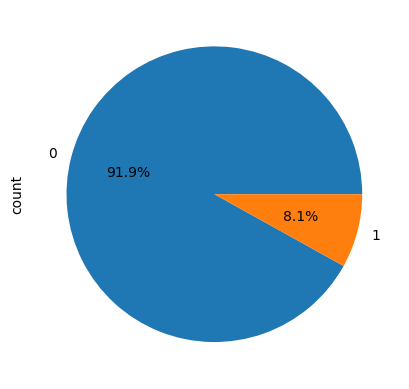

In [44]:
#On est sur un cas de déséquillibre : 91 vs 8 %
app_train['TARGET'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [45]:
# Utiliser RandomOverSampler pour suréchantillonner la classe minoritaire
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_emputed, y_train)

<Axes: ylabel='count'>

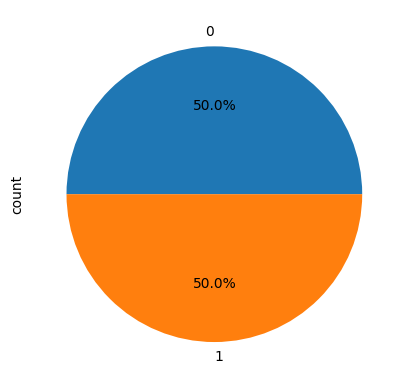

In [46]:
y_train_resampled.value_counts().plot(kind='pie',autopct='%1.1f%%')

### 6️⃣ Encodage et normalisation
Transformation des variables catégorielles et mise à l’échelle des données.

In [47]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.fit_transform(X_test_emputed)

In [48]:
X_train_scaled

array([[ 0.06750796, -0.29837377,  1.44313933, ..., -0.06043059,
         1.02470367, -0.08965843],
       [-0.84078423, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [ 0.88867175, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       ...,
       [ 1.49234573, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [-0.33577264, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [-0.14996236, -0.29837377, -0.69293379, ..., -0.06043059,
         1.02470367, -0.08965843]])

In [49]:
# Normalisation
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_resampled)
X_test_norm = scaler.fit_transform(X_test_emputed)

In [50]:
X_train_norm

array([[0.51966159, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25794028, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75627714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93022375, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40345766, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45699826, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

### 7️⃣ Réduction de dimension avec PCA
Réduction du nombre de dimensions tout en conservant un maximum de variance (95%).

In [51]:
# # La matrice de corrélation étant illisible, nous réduisons notre champ d'étude aux corrélations à += 80%

# # Calcul de la matrice de corrélation absolue
# corr_matrix = num_vars.corr().abs()

# # Masquage de la diagonale et de la moitié supérieure
# mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
# upper_tri = corr_matrix.where(mask)

# # Transformation en paires (col1, col2) et filtrage des corrélations fortes
# high_corr_pairs = (
#     upper_tri.stack()
#     .reset_index()
#     .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
# )

# # Filtrer pour les corrélations ≥ 0.8
# high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.8]

# # Trier par corrélation décroissante
# high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

# # Afficher
# print(f"\nPaires de variables avec une corrélation ≥ 0.8 :\n")
# print(high_corr_pairs)


In [52]:

# PCA pour 95% de variance expliquée
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Nombre de composantes conservées : {X_train_pca.shape[1]}")
print(f"Nombre de composantes conservées : {X_test_pca.shape[1]}")

Nombre de composantes conservées : 149
Nombre de composantes conservées : 149


## Les modèles utilisés

### 1️⃣ XGBClassifier

Avec les données normalisées :

In [62]:
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model.fit(X_train_norm, y_train_resampled)

# y_pred = model.predict(X_test_norm)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

# # Afficher le rapport de classification mis à jour
# print("Classification Report:\n", classification_report(y_test, y_pred))

Avec les données non normalisées :

In [54]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\kheli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:49:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9191
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.48      0.03      0.06      7448

    accuracy                           0.92     92254
   macro avg       0.70      0.51      0.51     92254
weighted avg       0.89      0.92      0.89     92254



### 2️⃣ Decision Tree

In [63]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train  , y_train)

# acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
# acc_decision_tree

# # Faire des prédictions sur l'ensemble de test
# y_pred = decision_tree.predict(X_test)

# # Évaluer les performances du modèle
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Afficher le rapport de classification mis à jour
# print("Classification Report:\n", classification_report(y_test, y_pred))

# #Afficher la matrice de confusion
# print(confusion_matrix(y_test,y_pred))

In [56]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_norm  , y_train_resampled)

acc_decision_tree = round(decision_tree.score(X_train_norm, y_train_resampled) * 100, 2)
acc_decision_tree

# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test_norm)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

#Afficher la matrice de confusion
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     84806
           1       0.10      0.09      0.10      7448

    accuracy                           0.86     92254
   macro avg       0.51      0.51      0.51     92254
weighted avg       0.85      0.86      0.86     92254

[[78806  6000]
 [ 6766   682]]


### 3️⃣  Construction du modèle de réseau de neurones
Création d’un modèle simple avec Keras : Dense, Dropout, Sigmoid pour la sortie.

Utilisation d’un callback `EarlyStopping` pour éviter le surapprentissage.

In [57]:

# Architecture du modèle
model = Sequential()

# Couche d'entrée
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dropout(0.3))

# Couches cachées
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraînement
model.fit(
    X_train_pca, y_train_resampled,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stop]
)


C:\Users\kheli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.6829 - loss: 0.6418 - val_AUC: 0.7392 - val_loss: 0.6888
Epoch 2/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7411 - loss: 0.6004 - val_AUC: 0.7398 - val_loss: 0.7090
Epoch 3/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7508 - loss: 0.5908 - val_AUC: 0.7384 - val_loss: 0.7289
Epoch 4/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7586 - loss: 0.5819 - val_AUC: 0.7379 - val_loss: 0.7179


In [ ]:

# # Architecture du modèle
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))
# model.add(Dropout(0.4))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compilation du modèle
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# # Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Entraînement
# model.fit(
#     X_train_resampled, y_train_resampled,
#     epochs=50,
#     batch_size=256,
#     validation_data=(X_test_scaled, y_test),
#     callbacks=[early_stop]
# )


Epoch 1/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.5074 - loss: 2855.2773 - val_AUC: 0.4934 - val_loss: 0.8616
Epoch 2/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5037 - loss: 15.2892 - val_AUC: 0.5245 - val_loss: 0.9469
Epoch 3/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5064 - loss: 2.7280 - val_AUC: 0.5387 - val_loss: 1.0416
Epoch 4/50
1546/1546 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5107 - loss: 3.7183 - val_AUC: 0.5371 - val_loss: 0.9951


### 5️⃣ Évaluation et interprétation
Calcul de l’AUC, matrice de confusion, et autres métriques pertinentes.

### 🔍 Visualisation de la variance expliquée par le PCA

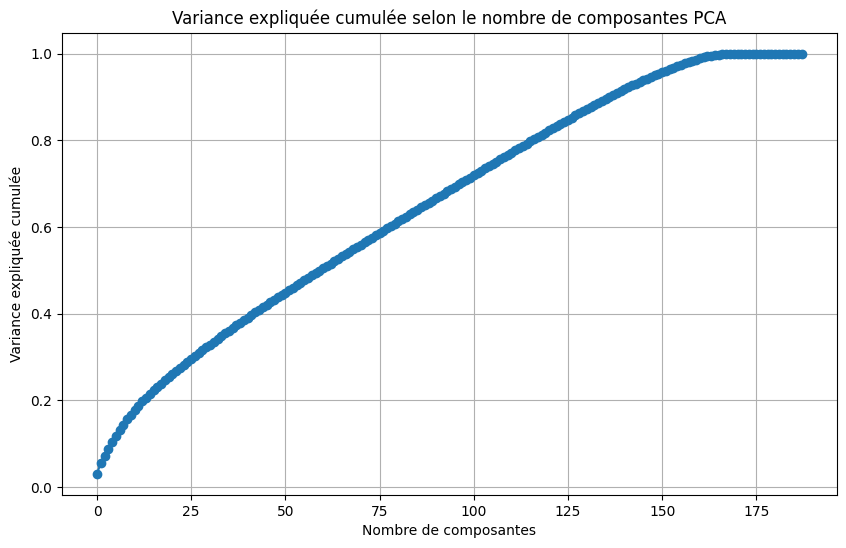

In [59]:
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title("Variance expliquée cumulée selon le nombre de composantes PCA")
plt.grid(True)
plt.show()


### 📈 Courbes d'apprentissage (Loss et AUC)

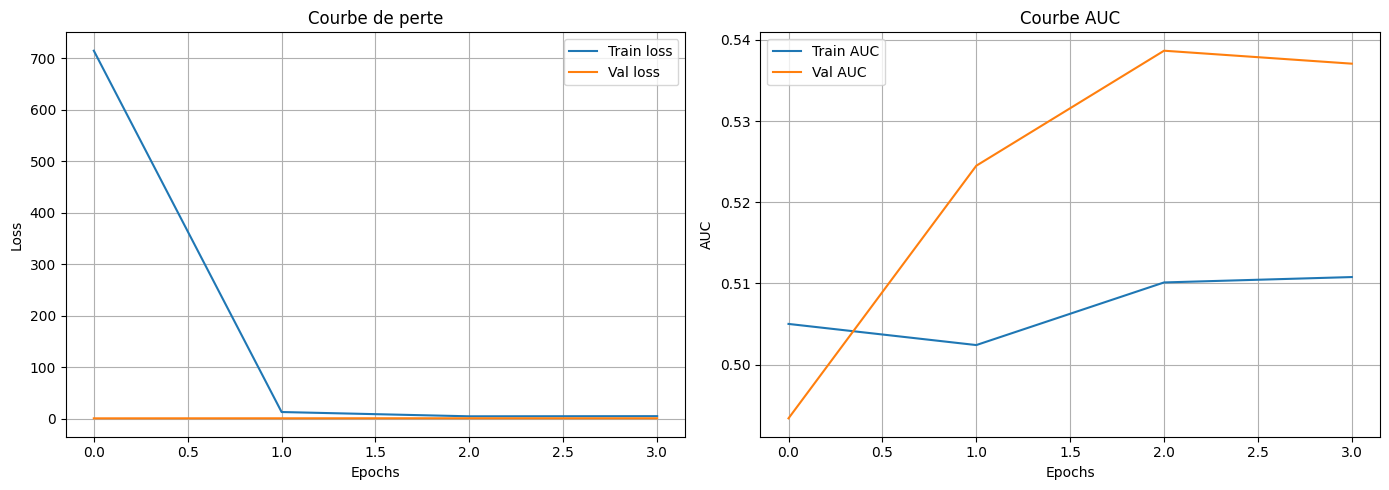

In [60]:
# Affichage des courbes d'entraînement
history = model.history

plt.figure(figsize=(14, 5))

# Courbe Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Courbe de perte")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Courbe AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Train AUC')
plt.plot(history.history['val_AUC'], label='Val AUC')
plt.title("Courbe AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 🔲 Matrice de confusion

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_proba = model.predict(X_test_pca)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 188, but received input with shape (32, 149)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 149), dtype=float32)
  • training=False
  • mask=None

### 🧮 Courbe ROC et AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 📋 Rapport de classification

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))
